In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("//content/drive/MyDrive/IBM/Dataset/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [ ]:
test_dataset = test.flow_from_directory("///content/drive/MyDrive/IBM/Dataset/Dataset/train_set",

                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices


{'forest': 0, 'with fire': 1}

In [ ]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [ ]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)


Epoch 1/5
4/4 [==============================] - 157s 49s/step - loss: 0.6727 - accuracy: 0.5537 - val_loss: 0.5991 - val_accuracy: 0.6445
Epoch 2/5
4/4 [==============================] - 28s 9s/step - loss: 0.5858 - accuracy: 0.6281 - val_loss: 0.5374 - val_accuracy: 0.6835
Epoch 3/5
4/4 [==============================] - 25s 7s/step - loss: 0.4920 - accuracy: 0.7273 - val_loss: 0.4686 - val_accuracy: 0.8028
Epoch 4/5
4/4 [==============================] - 25s 7s/step - loss: 0.2346 - accuracy: 0.9008 - val_loss: 0.2644 - val_accuracy: 0.8876


In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

14/14 [==============================] - 17s 1s/step


In [ ]:
print(len(predictions))


436


In [ ]:
model.save("/content/forestmodel.h5")



In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2


In [ ]:
model = load_model("/content/forestmodel.h5")


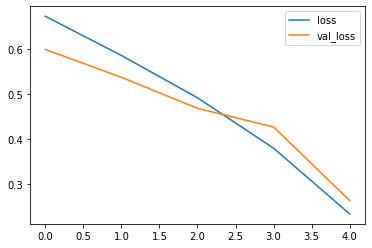

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


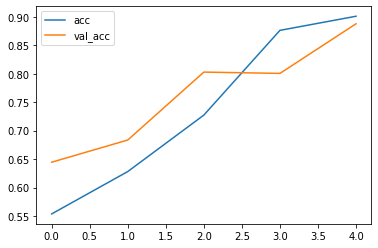

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  val=model.predict(x)
  print(val)
  if val==0:
    plt.xlabel("No fire Detected!!",fontsize=30)
  elif val==1:
    plt.xlabel("Fire Detected!!",fontsize=30)

1/1 [==============================] - 0s 34ms/step
[[1.]]


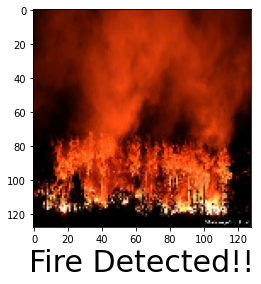

In [ ]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 22ms/step
[[0.]]


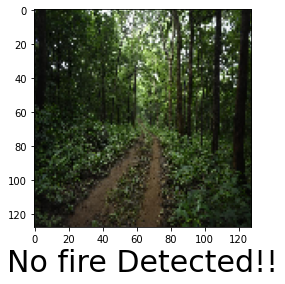

In [ ]:
predictImage("////content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg")


In [ ]:
pip install twilio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 20.7 MB/s 


In [ ]:
pip install playsound


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=6b110075db834069d9ea4d0ca2656bd9170d0da7e3afd16b31fbdba93bc2cab7
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [ ]:
#load the saved model
model = load_model(r'/content/forestmodel.h5')
#define video
video = cv2.VideoCapture('//content/drive/MyDrive/IBM/forest video')
#define the features
name = ['forest','with forest']

In [ ]:
video.isOpened()


True

In [ ]:
from tensorflow.keras.preprocessing import image


In [ ]:
from IPython.display import Audio


In [ ]:
while(video.isOpened()):
  success,frame=video.read()
  cv2.imwrite("image.jpg",frame)
  img=image.load_img("/content/image.jpg",target_size=(128,128))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  pred=model.predict(x)
  p=pred[0]
  print(pred)
  cv2.putText(frame,"predicted class = ",(100,100),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
  if pred[0]==1:
    account_sid='AC1a92521871480f58548ab47433527298'
    auth_token='596097e117fb2295a39c05a192353001'
    client=Client(account_sid,auth_token)
    message=client.messages \
    .create(
        body="Forest fire is detected ,stay alert",
        from_='+14258421887',
        to='+919150947787')
    print(message.sid)
    print('Fire detected')
    print('SMS sent')
    wn=Audio('/content/tornado-siren.mp3',autoplay=True)
    display(wn)
    break
  else:
    print('No danger')
    break
  if cv2.waitKey(1) & 0xFF==ord('a'):
    break
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 87ms/step
[[0.]]
No danger
